In [346]:
#libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import kstest
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from joypy import joyplot
import numpy as np
from math import pi

# Descripción del dataset

In [347]:
# Cargamos el fichero de trabajo
data_raw = pd.read_csv("Fifa_Players.csv",encoding='ansi')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          17588 non-null  int64  
 1   ID                  17588 non-null  int64  
 2   Name                17588 non-null  object 
 3   Nationality         17588 non-null  object 
 4   National_Position   1075 non-null   object 
 5   National_Kit        1075 non-null   float64
 6   Club                17588 non-null  object 
 7   Club_Position       17587 non-null  object 
 8   Club_Kit            17587 non-null  float64
 9   Club_Joining        17587 non-null  object 
 10  Contract_Expiry     17587 non-null  float64
 11  Rating              17588 non-null  float64
 12  Height              17588 non-null  int64  
 13  Weight              17588 non-null  int64  
 14  Preffered_Foot      17588 non-null  object 
 15  Birth_Date          17588 non-null  object 
 16  Age 

#  Integración y selección de los datos

In [348]:
#Seleccion de atributos
selected_columns=['Name','Nationality','Club','Club_Position','Height','Preffered_Foot','Rating',
                  'Ball_Control','Dribbling','Marking','Reactions','Interceptions',
                  'Attacking_Position','Vision','Short_Pass','Balance',
                  'Long_Pass','Freekick_Accuracy']
data_raw_selected=data_raw[selected_columns]

In [349]:
# Renombramos los atributos
renamed_cols=['Name','Nationality','Club','Position','Height','Preffered_Foot','Rating',
              'Ball_Control','Dribbling','Marking','Reactions','Interceptions','Attack',
              'Vision','Short_Pass','Balance','Long_Pass','Freekick_Accuracy']                     
                  
data_raw_selected.columns=renamed_cols       
work_fifa_data=data_raw_selected
work_fifa_data['Rating']=work_fifa_data['Rating']*100

C:\Users\2082914\AppData\Local\Temp/ipykernel_14068/4135769940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_fifa_data['Rating']=work_fifa_data['Rating']*100


In [350]:
#Work dataset sumamry cols
work_fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               17588 non-null  object 
 1   Nationality        17588 non-null  object 
 2   Club               17588 non-null  object 
 3   Position           17587 non-null  object 
 4   Height             17588 non-null  int64  
 5   Preffered_Foot     17588 non-null  object 
 6   Rating             17588 non-null  float64
 7   Ball_Control       17588 non-null  int64  
 8   Dribbling          17588 non-null  int64  
 9   Marking            17588 non-null  int64  
 10  Reactions          17588 non-null  int64  
 11  Interceptions      17588 non-null  int64  
 12  Attack             17588 non-null  int64  
 13  Vision             17588 non-null  int64  
 14  Short_Pass         17588 non-null  int64  
 15  Balance            17588 non-null  int64  
 16  Long_Pass          175

# 1 - HISTOGRAMA

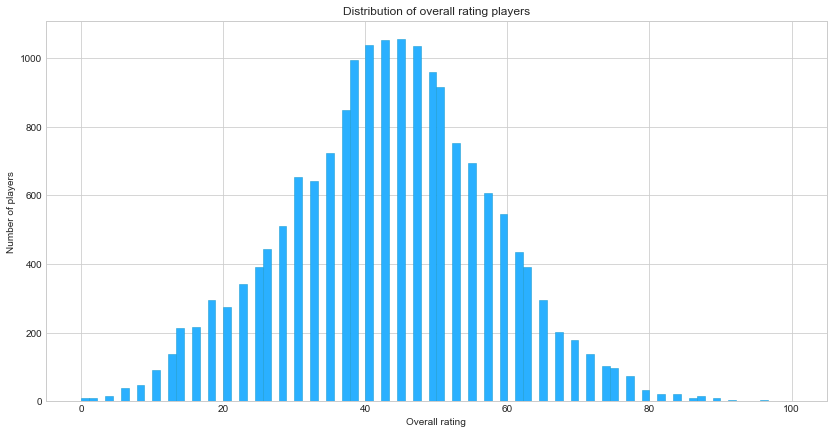

In [352]:
x = (work_fifa_data['Rating']) # normal distribution
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(x, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Distribution of overall rating players') 
plt.xlabel('Overall rating') 
plt.ylabel('Number of players') 
plt.show()

# 2 - DIAGRAMA DE CAJAS [BOXPLOT]

Text(0.5, 1.0, 'Diestros')

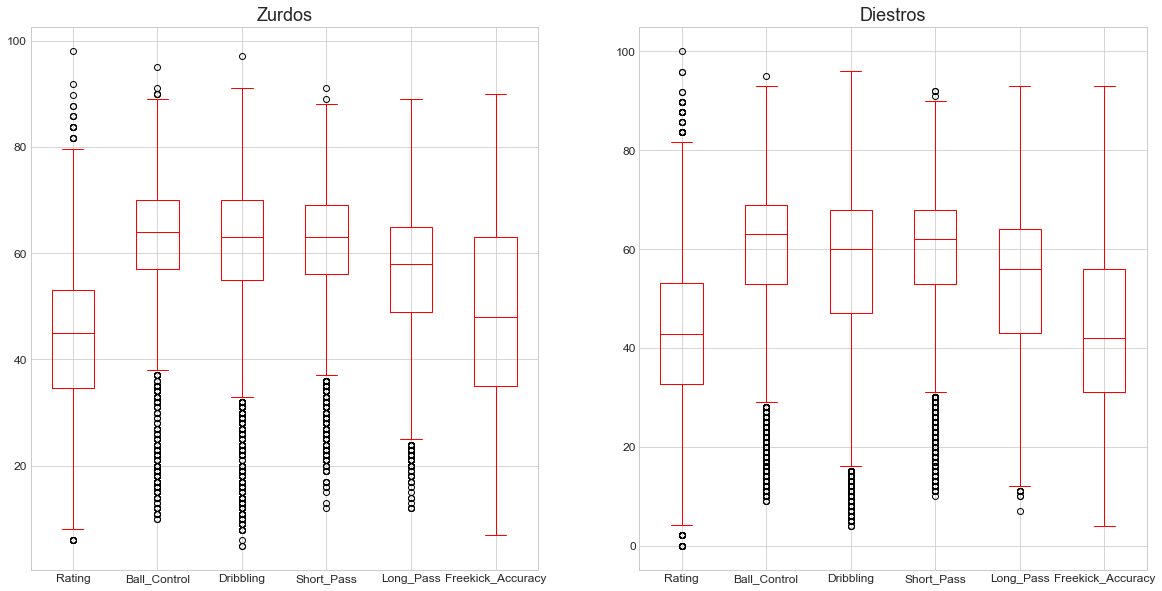

In [353]:
field_players=work_fifa_data[work_fifa_data['Position']!='GK']

zurdos=field_players[field_players['Preffered_Foot']=='Left']
diestros=field_players[field_players['Preffered_Foot']=='Right']
atributos_de_comparacion=['Rating','Ball_Control','Dribbling','Short_Pass','Long_Pass','Freekick_Accuracy']

# Box plot [Jugadores de campo]
fig, ax = plt.subplots(1,2,figsize=(20,10))
zurdos.boxplot(color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
               fontsize=12,
               column=['Rating','Ball_Control','Dribbling','Short_Pass','Long_Pass','Freekick_Accuracy'],ax=ax[0])
ax[0].set_title('Zurdos',fontsize=18)

diestros.boxplot(color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
                 fontsize=12,
                 column=['Rating','Ball_Control','Dribbling','Short_Pass','Long_Pass','Freekick_Accuracy'],ax=ax[1])
ax[1].set_title('Diestros',fontsize=18)

# 3 - DIAGRAMA DE DISPERSION (SCATTER) [Correlacion]

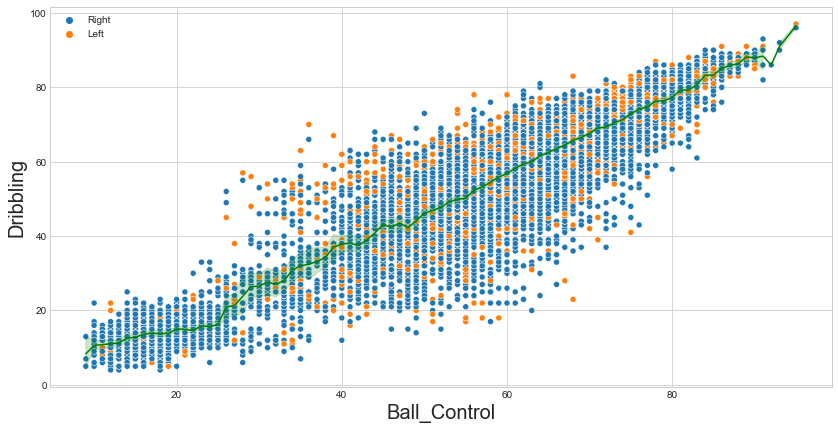

In [354]:
fig, ax = plt.subplots(figsize=(14,7))
p1 = sns.scatterplot(data=field_players, x="Ball_Control", y="Dribbling",hue="Preffered_Foot", ax=ax)
p1.set_xlabel("Ball_Control",fontsize=20)
p1.set_ylabel("Dribbling",fontsize=20)
p2 = sns.lineplot(data=field_players, x="Ball_Control", y="Dribbling", color='g', ax=ax)

# 4 - DIAGRAMA DE DENSIDAD [RIDGELINE]

<Figure size 432x288 with 0 Axes>

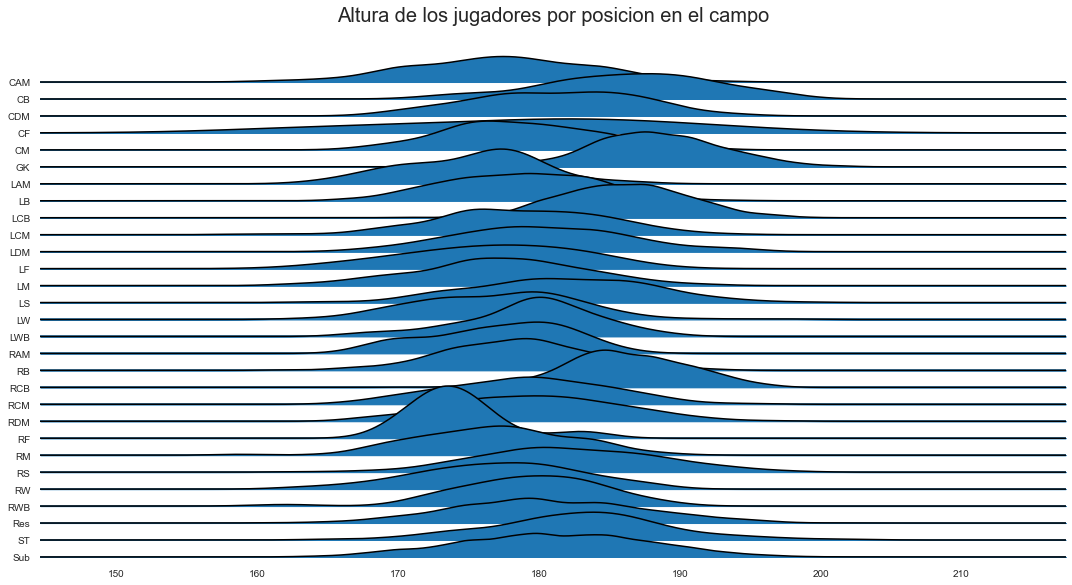

In [356]:
plt.figure()
joyplot(
    data=work_fifa_data[['Position','Height']], 
    by='Position',
    figsize=(15, 8))      

plt.title('Altura de los jugadores por posicion en el campo', fontsize=20)
plt.show()

# 4 - Radar Graph

In [363]:
# set data
national_comparison=work_fifa_data[['Nationality','Rating','Dribbling','Vision',
                                   'Reactions','Attack','Interceptions','Marking','Short_Pass']]
national_comparison=national_comparison[national_comparison['Nationality'].isin(['Brazil','Spain'])]

national_grouped=national_comparison.groupby(['Nationality']).mean()
display(national_grouped)

,Rating,Dribbling,Vision,Reactions,Attack,Interceptions,Marking,Short_Pass
Nationality,,,,,,,,
Brazil,51.095129,58.630435,56.405034,67.002288,53.176201,51.243707,48.557208,62.070938
Spain,51.700680,57.191534,56.592593,65.666667,53.140741,51.357672,46.093122,63.323810


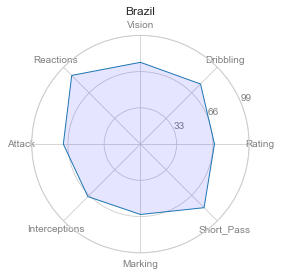

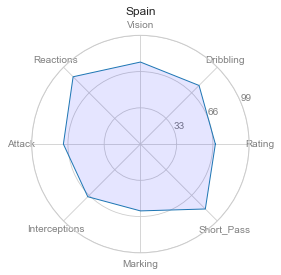

In [364]:

# Set data [input calculated values]
df = pd.DataFrame({
'group': ['Brazil','Spain'],
'Rating': [51.095129, 51.700680,],
'Dribbling': [58.630435, 57.191534,],
'Vision': [56.405034, 56.592593],
'Reactions': [67.002288, 65.666667,],
'Attack': [53.176201, 53.140741],
'Interceptions': [51.243707, 51.357672,],
'Marking': [48.557208, 46.093122,],
'Short_Pass': [62.070938, 63.323810],
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:

for i in range (0,2):
  

    values=df.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    
    ax = plt.subplot(1,1,1, polar=True)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=10)

    # Draw ylabels
#     ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["33","66","99"], color="grey", size=10)
    plt.ylim(0,75)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.set_title(str(df['group'][i]))

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    # Show the graph   
    plt.show()

# 6 - MAPA DE CONEXIONES [DATA]

In [345]:
# Set data (source and target)
conexion_map=work_fifa_data[['Club','Nationality']]
conexion_map=conexion_map[conexion_map['Club'].isin(['Real Madrid','FC Barcelona'])]
conexion_map['source_id'] = conexion_map['Nationality'].factorize()[0]
display(conexion_map.head(10))

,Club,Nationality,source_id
0,Real Madrid,Portugal,0
1,FC Barcelona,Argentina,1
2,FC Barcelona,Brazil,2
3,FC Barcelona,Uruguay,3
7,Real Madrid,Wales,4
12,Real Madrid,Croatia,5
16,Real Madrid,Spain,6
23,Real Madrid,Germany,7
29,Real Madrid,Portugal,0
32,FC Barcelona,Spain,6


# 7 - GRAFICO DE BURBUJAS [Balance Ataque - Defensa] [DATA]

In [343]:
#BALANCE ATAQUE DEFENSA por equipo
club_comparison=work_fifa_data[['Club','Attack','Interceptions','Balance']]
club_comparison=club_comparison[club_comparison['Club'].isin(['Real Madrid','FC Barcelona','Atlético Madrid',
                                                              'FC Bayern','Bor. Dortmund','Chelsea','Manchester City',
                                                              'Juventus','Milan','PSG','Olym. Lyonnais'])]
display(club_comparison.head(5))

,Club,Attack,Interceptions,Balance
0,Real Madrid,94,29,63
1,FC Barcelona,93,22,95
2,FC Barcelona,90,36,82
3,FC Barcelona,92,41,60
4,FC Bayern,12,30,35


In [340]:
# average
club_comparison.groupby(['Club']).mean()

,Attack,Interceptions,Balance
Club,,,
Atlético Madrid,56.451613,51.870968,65.645161
Bor. Dortmund,57.375000,55.750000,69.718750
Chelsea,53.333333,53.272727,65.000000
FC Barcelona,59.484848,58.515152,66.848485
FC Bayern,61.000000,59.730769,70.615385
Juventus,57.928571,61.107143,68.821429
Manchester City,60.424242,49.363636,71.818182
Milan,58.241379,55.068966,66.241379
Olym. Lyonnais,54.937500,49.406250,71.593750
